In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


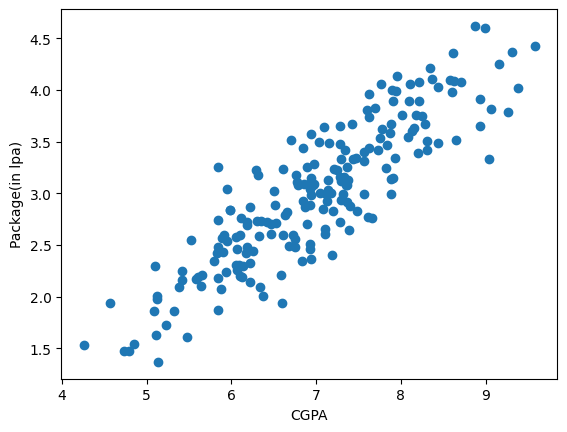

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.show()

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,1]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(X_train, y_train)

LinearRegression()

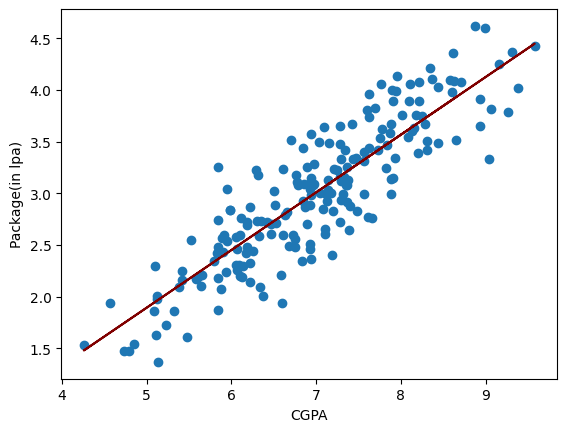

In [10]:
plt.plot(X_train, lr.predict(X_train), color='maroon')
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
y_pred = lr.predict(X_test)

### Mean Absolute Error

In [14]:
mean_absolute_error(y_test, y_pred)

0.2884710931878175

### Mean Squared Error

In [16]:
mean_squared_error(y_test, y_pred)

0.12129235313495527

### Root Mean Squared Error

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(0.34827051717731616)

### R2 Score

In [20]:
r2 = r2_score(y_test, y_pred)
r2

0.780730147510384

### Adjusted R2 Score

In [22]:
X_test.shape

(40, 1)

In [23]:
1 - (((1 - r2)*(40 - 1)) / (40 - 1 - 1))

0.7749598882343415

### Adding a random feature to show the significant difference between the r2 scored and the adjusted r2 score

In [25]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.479953,3.26
1,5.12,0.026739,1.98
2,7.82,0.040297,3.25
3,7.42,0.166556,3.67
4,6.94,0.777366,3.57


Text(0, 0.5, 'Package(in lpa)')

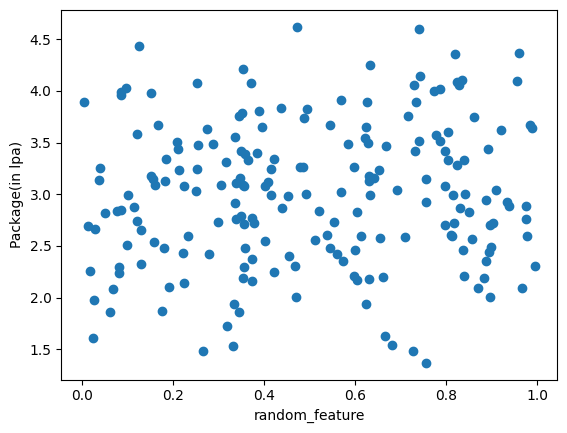

In [26]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [27]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_test)

In [32]:
r2 = r2_score(y_test, y_pred)
r2

0.7801511346126706

In [33]:
1 - (((1 - r2)*(40 - 1)) / (40 - 1 - 1))

0.7743656381551093